In [1]:
import numpy as np
import pandas as pd

# Section 12: Data Visualization

**Data visualization** is the practice of producing graphical representations of data to convey a finding, summarize a concept, or get a quick understanding of the dataset we're working with.

In this section we'll cover:
* matplotlib
* plotting in Pandas, including:
  * bar chards
  * histograms
  * pie plots
  * scatter plots
  * jointplots
* an introduction to other dataviz libraries and concepts

We'll be answering various questions using different chart types, and we'll which graphs to use in which situations. Data visualization is critical to being able to communicate your data with colleagues and peers. Aspects of data visualization can also be incorporated into rich infographics. The possibilities are endless.

In this section we'll go from raw data to visual representations in a modest fashion. We'll start from the very basics and build up to more advanced graphs. Perhaps more important than the mechanics of building a graph is to understand when to use each type of graph to answer specific questions. It is important to use the correct chart in the right context to avoid producing misleading or nonsense graphs.

## The Preliminaries of matplotlib

**matplotlib** is a Python library that serves as the workhorse data visualization package that, among other things, powers the plotting methods in Pandas. Keep in mind, though, that matplotlib goes beyond Pandas and supports many backend applications. 

* https://matplotlib.org/stable/gallery/index.html

Let's start by generating from random data. We'll sample 400 random observations from the normal distribution.

In [2]:
np.random.normal(size = 400)

array([-1.04947795e+00,  1.20061915e+00, -2.44768226e-01,  1.05073801e+00,
        1.39199423e+00,  1.25992232e+00, -3.34677125e-01,  2.99847531e-01,
        1.74036653e-01,  8.09726367e-02,  5.63436837e-01, -1.39210259e+00,
        9.02204753e-01, -1.27602939e-01, -8.08185451e-01, -6.41130269e-01,
        5.44591429e-01,  7.21564908e-01,  5.35639174e-01, -3.48209183e-01,
        1.28302602e-01, -1.14112069e+00,  2.12969144e-01, -1.17510066e+00,
       -7.45081492e-01,  1.01108036e+00,  5.24545686e-01,  3.82995478e-01,
       -2.37094662e+00,  1.42001955e+00, -1.01533013e+00, -1.29671360e-01,
       -1.72360370e+00, -3.29524535e-01,  3.46638906e-02,  8.15367027e-02,
        4.23784095e-01, -4.30011458e-01, -1.06038228e+00,  7.22865113e-01,
       -6.57661800e-01,  1.70392442e+00, -3.92219024e-01, -1.04905738e+00,
       -7.63853409e-01, -3.17757519e-01, -5.44572657e-02, -2.40123860e+00,
        6.60085601e-01,  6.58467720e-01, -2.11268423e+00,  6.65870407e-01,
        1.73268922e-01, -

In [3]:
x = np.random.normal(size = 400)

Let's now import matplotlib. We use the pyplot functions of matplotlib primarily, which are a collection of functions that make matplotlib work somewhat like MATLAB.
* https://matplotlib.org/stable/tutorials/introductory/pyplot.html

Referring to *pyplot* as `plt` is a convention in the community.

In [5]:
import matplotlib.pyplot as plt
# alternatively: from matplotlib import pyplot as plt

Let's plot our randomly sampled data. To do this we can use the simply method `plt.plot()`.

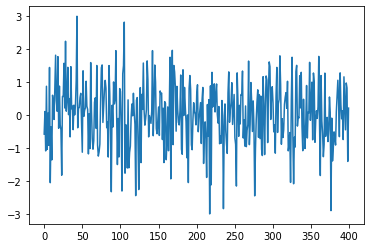

In [6]:
plt.plot(x)

Definitely not the most attractive plot, but it works. It produces a visualization of the data we passed in.

Instead of plotting each individual value, let's instead try plotting the cumulative sum such that we create the appearance of a series evolving through time.

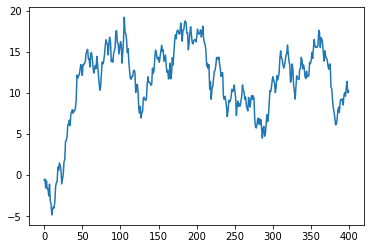

In [7]:
plt.plot(x.cumsum())

Notice that in addition to the plot itself, the code also outputs a Python list indicating its place in memory. The instructor doesn't find this particularly useful, and usually suppreses it by placing a semicolon at the end of the code line.

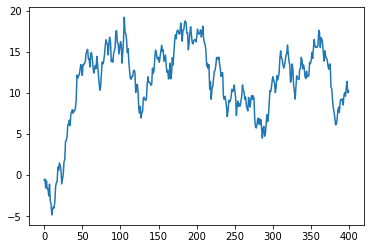

In [8]:
plt.plot(x.cumsum());

Now let's talk about styling. Matplotlib offers a rich interface to change many details of the plots. However, the instructor recommends starting with the built-in templates. 
Let's see what styles we have available.

In [9]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Let's pick one of them, say, `ggplot`.

In [10]:
plt.style.use('ggplot')

Now let's re-execute the plot

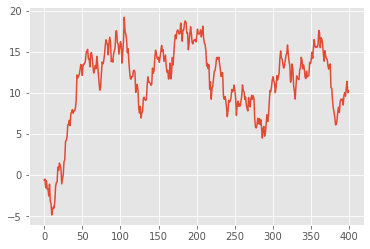

In [11]:
plt.plot(x.cumsum());

Looks nice! The instructor suggests trying others to see what you like.

What happens if we want to add more data to this plot? Let's start by generating another series of data.

In [12]:
y = np.random.normal(size = 400)

And then we plot it.

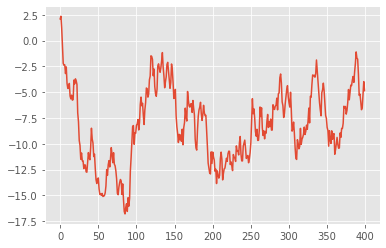

In [13]:
plt.plot(y.cumsum());

Okay so that worked, but we're getting our two series `x` and `y` on two separate plots. How do we get them onto the same figure? 

We can do this by placing them into the same code cell and executing that cell.

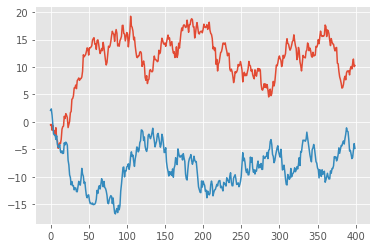

In [14]:
plt.plot(x.cumsum());
plt.plot(y.cumsum());

Cool! Notice how matplotlib has plotting both series on the same set of axes, and has automatically colored the two series differently. Colors can always be changed using the `color` parameter in the plot function.

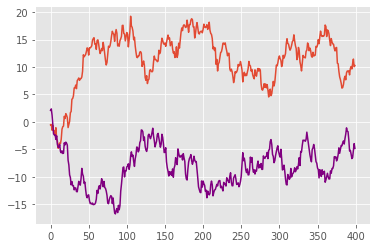

In [15]:
plt.plot(x.cumsum());
plt.plot(y.cumsum(), color = 'purple');

Our graph is pretty uninformative with **axis labels**. Let's add some!

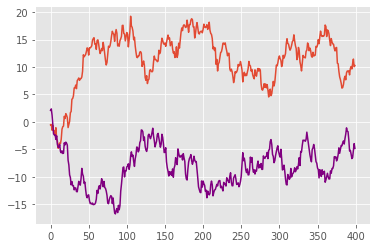

In [16]:
plt.plot(x.cumsum(), label = 'x');
plt.plot(y.cumsum(), color = 'purple', label = 'y');

So that didn't really do much. We still can't tell which series is which. To fix this, we can add a useful **legend**. This should be called within the same code cell/block as the plotting calls.

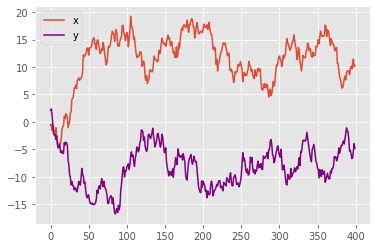

In [17]:
plt.plot(x.cumsum(), label = 'x');
plt.plot(y.cumsum(), color = 'purple', label = 'y');
plt.legend();

We've so far been using the word "plot" very loosely to refer to our graph that we see. However, the more technically correct term to use is **figure**, which is the *overall container that holds our plot*. 

The **figure** actually acts as a *grid* that holds or contains one or more individual graphs as *axes*. The axes within a figure refer to the space where the graph is plotted.

To demonstrate, let's get a hold of the figure and axes separately.


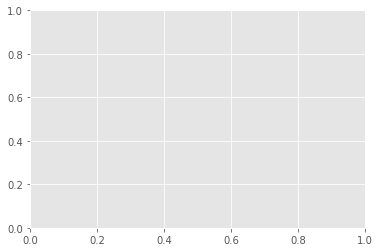

In [18]:
figure, axes = plt.subplots()

We now have a figure and a set of axes, with the figure showing. We can now replot our data as we did before, but this time we'll call it on the axes. Remember, the figure is just a container and the axes is where the plotting actually takes place.

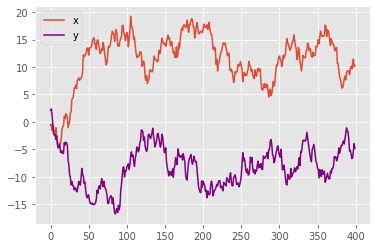

In [19]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

Very nice. What else can we do? Perhaps we can squish the graph down a bit so that the plot is shorter and wider. For this, we need to change the size of the figure canvas. We do this by calling the `set_size_inches()` method on the `figure` object.
* https://www.geeksforgeeks.org/matplotlib-figure-figure-set_size_inches-in-python/



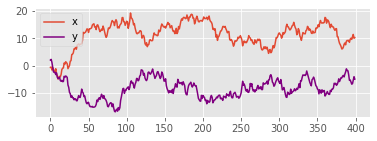

In [20]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

figure.set_size_inches(6, 2)

Sure enough we now have a longer graph. Let's make it even longer!

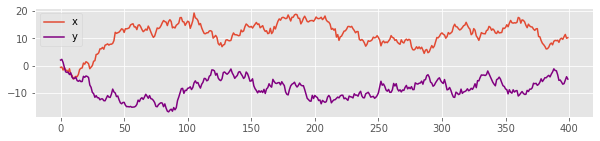

In [21]:
figure, axes = plt.subplots();
axes.plot(x.cumsum(), label = 'x');
axes.plot(y.cumsum(), color = 'purple', label = 'y');
axes.legend(loc = 'upper left');

figure.set_size_inches(10, 2)

The `plot()` method is actually an `axes` method. For convenience and quick access, it is also available on the pyplot object `plt`, which we saw above.
